### This project is comprised of hydrochemical dataset sourced from Kaggle.com

##### This project is an update of a combined work of Ihenetu Victoria, Athanasius Chinonso and Somtochukwu Azi to develop an accurate model to predict the potability of water based on several physico-chemical data such as pH, hardness, Solids, etc

* The dataset is shows a collection of physico-chemical parametric quantities such as pH,Total dissolved solids, hardness, etc.

* Building on the previously collaborated work with the authors, we want to be sure that the features that were selected for training and modeling actually affects water potability such as hypothesis testing, cross-validation, etc.

* Machine learning techniques was applied on the dataset to test, train, model prediction based on the important feature selections. 

* Features were selected created and selected based on the geological understanding of the effects of  knowledge

* Any new findings correlating (or not correlating) with other author's contribution on the dataset is independent of the other author's submission.


In [3]:
# To import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [5]:
#import dataset

WaterData = pd.read_csv("C:/Users/user/Downloads/water_potability.csv")

In [7]:
WaterData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
# Summary statistics of the dataset
WaterData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Conduct initial exploration on the data analysis without feature scaling and handling missing data

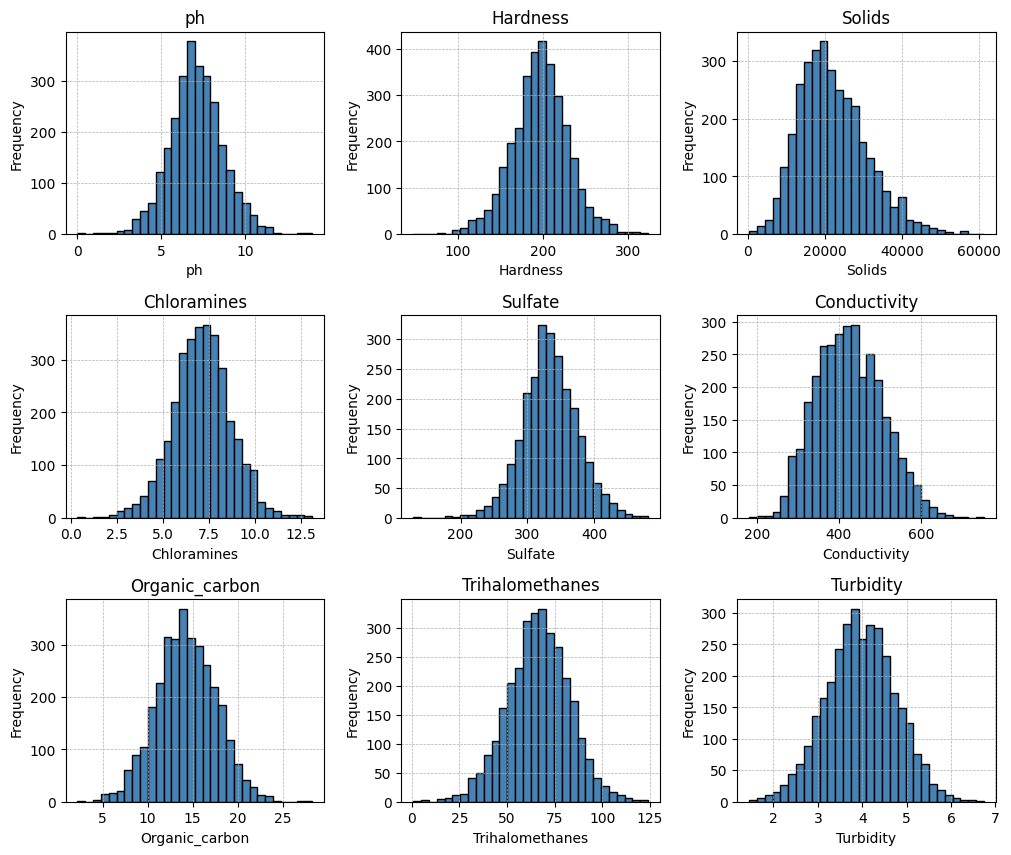

In [11]:
import matplotlib.pyplot as plt

# Automatically get the columns from your dataset (excluding 'Potability' if you don't want it)
columns = WaterData.columns.drop('Potability')  # Drop 'Potability' if it's not required in the histograms

# Create histograms with improved aesthetics
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 3x3 grid for the plots
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Add space between the plots

# Loop through the columns and create a histogram for each one
for i, ax in enumerate(axes.flat):
    if i < len(columns):  # Ensure we don't go out of bounds
        ax.hist(WaterData[columns[i]].dropna(), bins=30, color='steelblue', edgecolor='black')
        ax.set_title(columns[i], fontsize=12)  # Set the title
        ax.set_xlabel(columns[i])  # X-axis label
        ax.set_ylabel('Frequency')  # Y-axis label
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Light grid
    else:
        ax.axis('off')  # Hide any empty subplots

# Display the plot
plt.show()


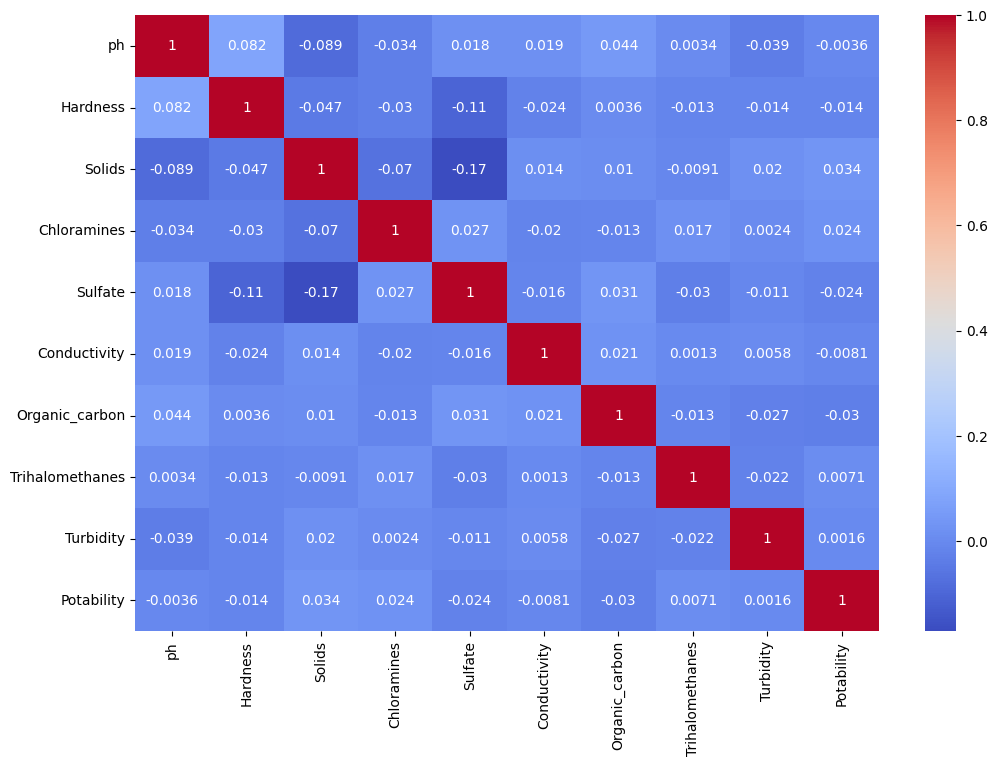

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(WaterData.corr(), annot=True, cmap='coolwarm')
plt.show()

### Handle Missing Data

* Check for missing values: Often, real-world datasets contain missing values that need to be addressed.

##### Strategies for missing data:
* Imputation (using mean, median, mode, or a predictive model)
* Removal of rows/columns (if missing values are not significant)
* Interpolation (for time series data)

In [15]:
# Check for missing values
missing_data = WaterData.isnull().sum()

# If missing data exists
print(missing_data[missing_data > 0])


ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64


### Data Cleaning
#### Remove or Impute Outliers: Outliers can distort your model, especially for models like linear regression. Decide whether to remove or cap them.

* Handle Duplicate Entries: Remove any duplicate rows or observations in your data.
* Ensure Consistent Data Types: Features should be in the appropriate data type, e.g., numerical features should be floats or integers, and categorical features should be converted to category type or one-hot encoded.

In [17]:
#Handling duplicates to ensure data integrity

WaterData.drop_duplicates(inplace=True)

In [19]:
# Check for missing values
missing_data = WaterData.isnull().sum()

# If missing data exists
print(missing_data[missing_data > 0])

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64


In [21]:
# Correcting missing value by filling missing values with the mean
WaterData.fillna(WaterData.mean(), inplace=True)

In [23]:
# Check for missing values
missing_data = WaterData.isnull().sum()

# If missing data exists
print(missing_data[missing_data > 0])

Series([], dtype: int64)


#### Empty Series array [] shows that there are no missing values to be corrected

##### An imbalanced dataset can cause models to become biased toward the majority class. 

* Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or using class-weighted models can help address this issue.

0    1998
1    1278
Name: Potability, dtype: int64


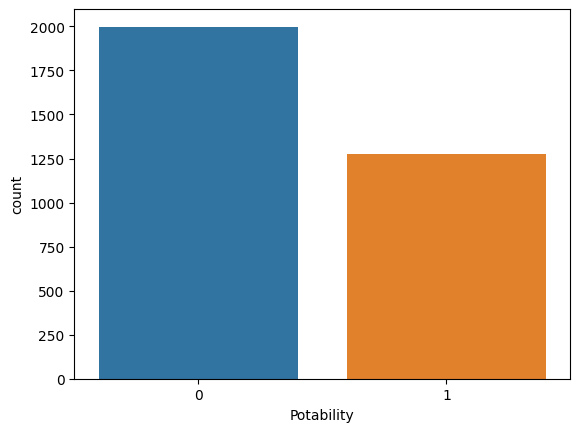

In [25]:
# Check the balance of the target
print(WaterData['Potability'].value_counts())

# Plot target distribution
sns.countplot(x='Potability', data=WaterData)
plt.show()

#### We are further going to select our feature parameters based on doman knowledge in hydrogeochemistry, underground water-mineral interaction.

* Technics may include interactive and ratio features. 

* Initially in the first code version of the project, the authors did not consider the importance of ensuring the features selected is relevant to predicting water potability, such that p < 0.005. 

* This is why the Code2 Version of water potability machine learning analysis have integrated statistical application such as cross-validation, t-test (p<0.005), etc

In [27]:
WaterData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Conduct feature engineering to select suitable features for model training and testing

* For the case of this study, we applied first, domain knowledge such as ratio and interactive features

* Knowing from the correlation map between hydrochemical features and water potability, alone (or independently per say) shows weak correlations. 

* Logically, we move ahead to explore how an interaction between the hydrochemical paramtric features would reveal about it's effects on water potability

#### Steps for Feature Engineering:
* #### Creating Product Features: Generate features that are the product of two or more columns.
* #### Creating Ratio Features: Create ratio features by dividing one column by another (handling divisions by zero).
* #### Creating Polynomial Features: Generate polynomial combinations of the features (e.g., squared, cubic terms).
* #### Log Transformations: Apply logarithmic transformations to specific columns to reduce skewness in distributions.
* #### Binning: Divide continuous features into bins (groups) to create categorical features.

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
# We created an array: column to hold the features that we are interested in creating interactions from

columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
           'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

print(WaterData.shape)
print(WaterData[col1].shape, WaterData[col2].shape) 

# 1. Create Product Features
for i, col1 in enumerate(columns):
    for col2 in columns[i+1:]:
        WaterData[f'{col1}_x_{col2}'] = WaterData[col1].iloc[:, 0] * WaterData[col2].iloc[:, 0]

# 2. Create Ratio Features
for i, col1 in enumerate(columns):
    for col2 in columns[i+1:]:
        col1_data = WaterData[col1].iloc[:, 0]
        col2_data = WaterData[col2].iloc[:, 0]
        WaterData[f'{col1}_div_{col2}'] = np.where(col2_data != 0, col1_data / col2_data, 0)
        WaterData[f'{col2}_div_{col1}'] = np.where(col1_data != 0, col2_data / col1_data, 0)


#3 Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Select the original DataFrame columns ensuring 2D input
poly_features = poly.fit_transform(WaterData[columns])  # Ensure all specified columns are used

# Convert polynomial features back into DataFrame
poly_columns = poly.get_feature_names_out(input_features=WaterData[columns].columns)  # Use original column names
poly_WaterData = pd.DataFrame(poly_features, columns=poly_columns)

# Concatenate the original DataFrame with the polynomial features DataFrame
WaterData = pd.concat([WaterData.reset_index(drop=True), poly_WaterData.reset_index(drop=True)], axis=1)

# 4. Log Transformations as a feature selection format
for col in columns:
    WaterData[f'log_{col}'] = np.log1p(WaterData[col].iloc[:, 0])  # log1p is log(1 + x) to avoid log(0)
    
# 5. Binning: Bin the continuous features into categories
for col in columns:
    WaterData[f'binned_{col}'] = pd.cut(WaterData[col].iloc[:, 0], bins=5, labels=False)  # 5 bins example


# Display the first few rows to see the new features
print(WaterData.head())


(3276, 379)
(3276, 4) (3276, 4)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  Turbidity^2  \
0       10.379783        86.990970   2.963135           0  ...     8.780171   
1       15.180013        56.329076   4.500656           0  ...    20.255907   
2       16.868637        66.420093   3.055934           0  ...     9.338731   
3       18.436524       100.341674   4.628771           0  ...    21.425517   
4       11.558279        31.997993   4.075075           0  ...    16.606240   

   Turbidity

In [71]:
WaterData.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,Turbidity^2,Turbidity Turbidity,Turbidity Turbidity,Turbidity Turbidity,Turbidity^2,Turbidity Turbidity,Turbidity Turbidity,Turbidity^2,Turbidity Turbidity,Turbidity^2
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,...,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110,...,16.344203,16.344203,16.344203,16.344203,16.344203,16.344203,16.344203,16.344203,16.344203,16.344203
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849,...,6.244189,6.244189,6.244189,6.244189,6.244189,6.244189,6.244189,6.244189,6.244189,6.244189
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000,...,2.102500,2.102500,2.102500,2.102500,2.102500,2.102500,2.102500,2.102500,2.102500,2.102500
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000,...,11.831611,11.831611,11.831611,11.831611,11.831611,11.831611,11.831611,11.831611,11.831611,11.831611
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000,...,15.642243,15.642243,15.642243,15.642243,15.642243,15.642243,15.642243,15.642243,15.642243,15.642243
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000,...,20.252878,20.252878,20.252878,20.252878,20.252878,20.252878,20.252878,20.252878,20.252878,20.252878
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000,...,45.414121,45.414121,45.414121,45.414121,45.414121,45.414121,45.414121,45.414121,45.414121,45.414121


### Feature Scaling

* Before we build our models, we will first scale the features we have scaled to the size numerical 'size'

* This is done before we conduct feature assessment test

In [72]:
#import StandardScaler for feature scaling computations

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(WaterData[columns])  # Replace 'columns' with your feature names


In [73]:
#Min-Max Scaling: Scale the features to a fixed range, usually [0, 1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(WaterData[columns])


In [74]:
# Robust Scaling: This method is robust to outliers by using the median and the interquartile range.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_features = scaler.fit_transform(WaterData[columns])


### Step 2: Testing Feature Importance

* After scaling the features, you can evaluate their importance using various methods. 

* We are using random forest classifier and Lasso regression to check for and extract important features that has been created

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(scaled_features, WaterData['Potability'])  # Replace 'Potability' with your actual target column name


RandomForestClassifier(random_state=42)

In [79]:
importances = rf_model.feature_importances_

# Assuming we used a subset of WaterData for fitting the model
feature_names = WaterData.columns[:len(importances)]  # Adjust this based on your model training

feature_importance_WaterData = pd.DataFrame({
    'Feature': feature_names,  # Ensure this aligns with your feature names
    'Importance': importances
})

# Sort the features by importance
feature_importance_WaterData = feature_importance_WaterData.sort_values(by='Importance', ascending=False)
print(feature_importance_WaterData.head(10))  # Display top 10 important features


                          Feature  Importance
2                          Solids    0.017477
34  Chloramines_x_Trihalomethanes    0.017475
7                 Trihalomethanes    0.017474
1                        Hardness    0.017102
4                         Sulfate    0.017100
0                              ph    0.017007
39            Sulfate_x_Turbidity    0.016772
6                  Organic_carbon    0.016754
13                   ph_x_Sulfate    0.016735
5                    Conductivity    0.016541


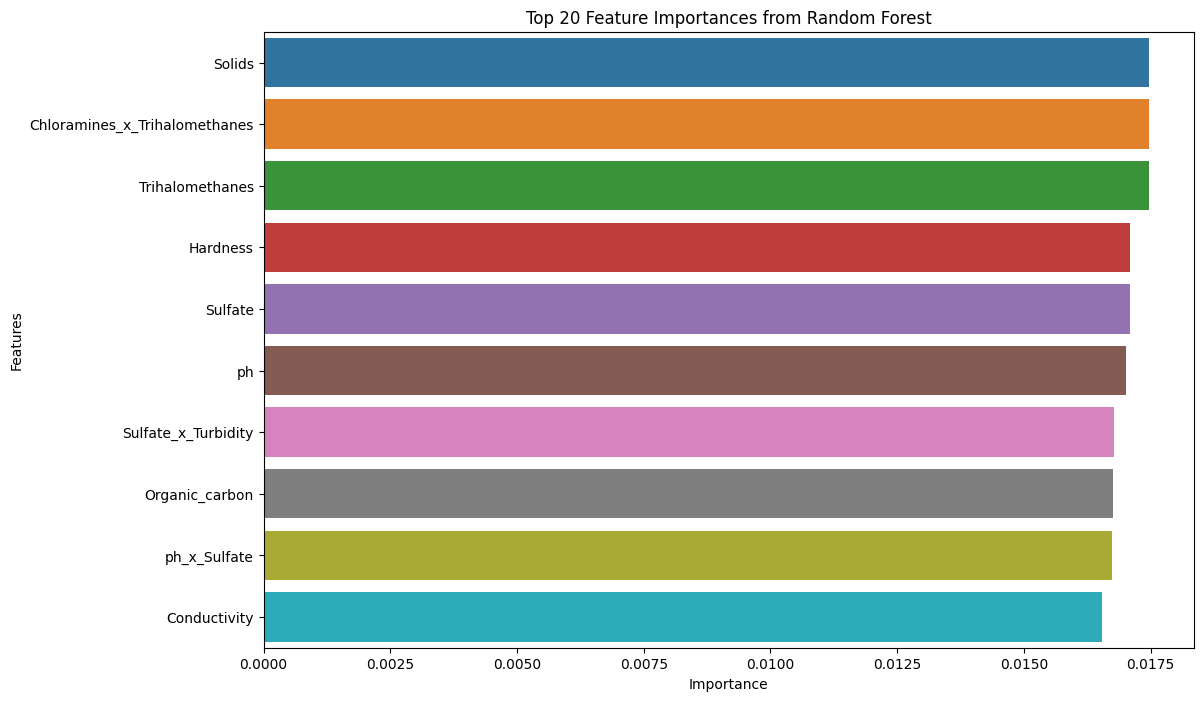

In [82]:

# Plot Random Forest feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_WaterData.sort_values(by='Importance', ascending=False).head(10))  # Top 10 features
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
